# Calcula la función de correlación para cada una de las cajas de datos del inciso anterior, usando los estimadores de: Peebles-Hauser, Davis-Peebles, Hamilton y Landy-Szalay.

Y recuerda escoger un bin adecuado para ver las señales. Utiliza 10 veces el número de puntos en las muestras aleatorias que con los datos.

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math

In [2]:
separacion = 25
longitud = 1000

def construyecaja (l, s):
    nxlado = int(l / s)
    ntot = nxlado ** 2
    px = []
    py = []
    c = 1
    for i in range(1, nxlado):
        for j in range(1, nxlado):
            px.append(s * i)
            py.append(s * j)
            c += 1
    return px, py

Funcion para obtener la distancia entre los puntos(sin repetir)

In [3]:
def distancia(x1,y1):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

Funcion para obtener la distancia entre los puntos de una distribucion aleatoria y una en forma de malla (sin repetir)

In [4]:
def distanciadr(x1,y1, xr, yr):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - xr[j]) ** 2 + (y1[i] - yr[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

### Construimos una muestra ordenada de puntos dentro de una caja de longitud 1000 y con separacion 25 entre puntos, ademas,  una muestra aleatoria con 10 veces el numero de puntos que la muestra ordenada

In [5]:
x1, y1 = construyecaja(longitud, separacion)
x2 = np.random.uniform(0, longitud, len(x1) * 10)
y2 = np.random.uniform(0, longitud, len(x1) * 10)

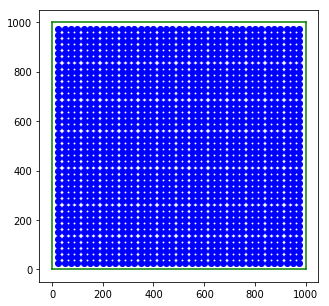

In [11]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(5, 5))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x1,y1, "bo")

Text(0,0.5,'EJE Y')

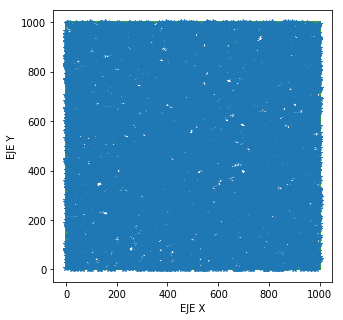

In [12]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x2,y2, "*")
plt.xlabel("EJE X")
plt.ylabel("EJE Y")

Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada

In [36]:
dmalla0 = distancia(x1, y1) # Calculamos la distancia entre los puntos del arreglo en malla
drandom0 = distancia(x2, y2) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr0 = distanciadr(x1, y1, x2, y2) # Calculamos la distancia entre los puntos ordenados y los aleatorios

In [8]:
nbins = 25

<Figure size 432x288 with 0 Axes>

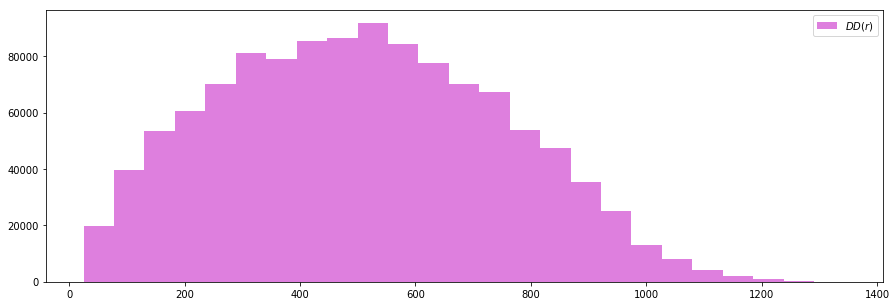

<Figure size 432x288 with 0 Axes>

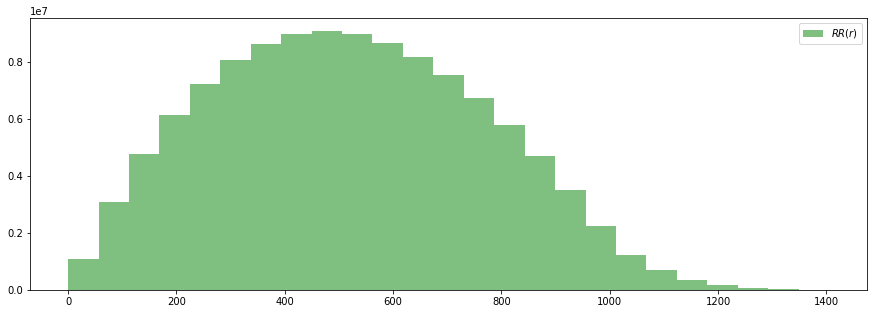

<Figure size 432x288 with 0 Axes>

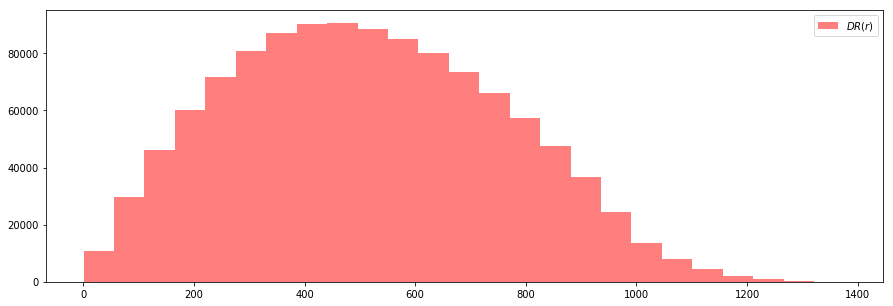

<Figure size 432x288 with 0 Axes>

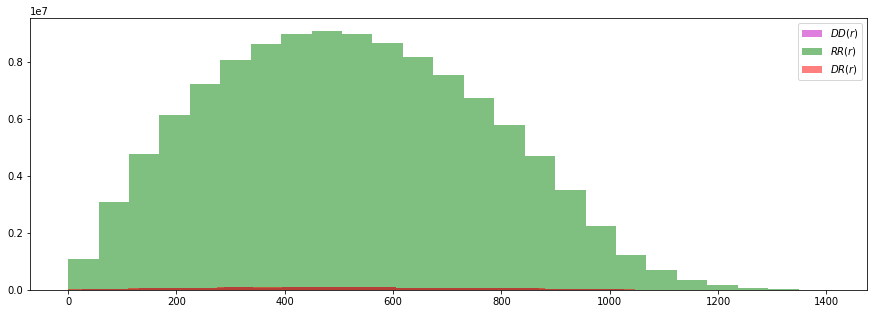

In [38]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla0, bins=nbins, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom0, bins=nbins, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr0, bins=nbins, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla0, bins=nbins, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom0, bins=nbins, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr0, bins=nbins, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

In [ ]:
#### <h1><center> Estimador de Hamilton $\zeta (r)=\frac{DD(r)RR(r)}{DR(r)^{2}}-1$ </center></h1>

In [37]:
def fham(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = np.abs(dd * rr) / (dr ** 2) - 1# Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Hamilton$', color = 'r')
    plt.legend()
    return co

<Figure size 360x360 with 0 Axes>

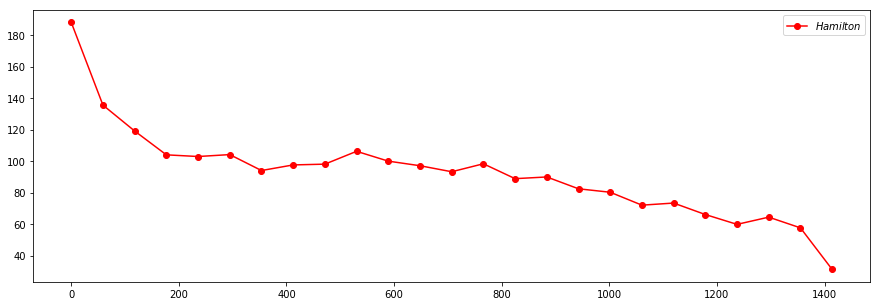

In [38]:
comparar1 = fham(x1, y1, x2, y2, longitud, nbins)

#### <h1><center> Estimador de Peebles - Hauser $\zeta (r)=\left(\frac{N_{rd}}{N}\right)^2\frac{DD(r)}{RR(r)}-1$ </center></h1>

In [17]:
def fpeha(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    # ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    # dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = (nrd / n) ** 2 * (dd / rr) - 1 # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Peebles - Hauser$', color = 'g')
    plt.legend()
    return co

<Figure size 360x360 with 0 Axes>

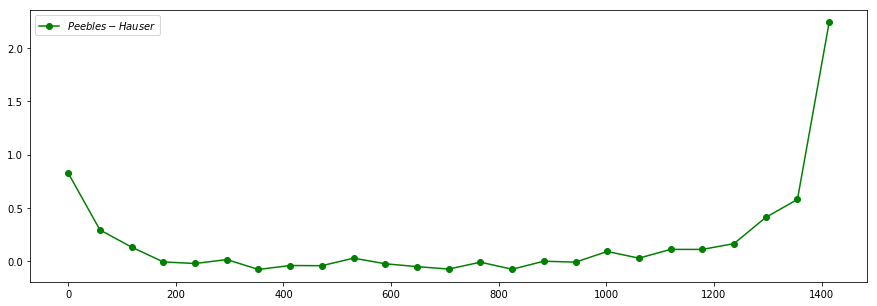

In [18]:
comparar2 = fpeha(x1, y1, x2, y2, longitud, nbins)

#### <h1><center> Estimador de Davis - Peebles $\zeta (r)=\frac{N_{rd}}{N}\frac{DD(r)}{DR(r)}-1$ </center></h1>

In [19]:
def fdape(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    # drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    # rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = (nrd / n) * (dd / dr) - 1 # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Davis - Peebles$', color = 'm')
    plt.legend()
    return co

<Figure size 360x360 with 0 Axes>

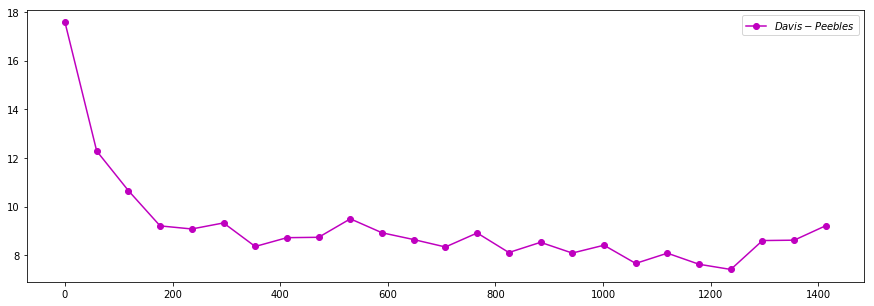

In [20]:
comparar3 = fdape(x1, y1, x2, y2, longitud, nbins)

#### <h1><center> Estimador de Landy - Szalay $\zeta (r)=1+\left ( \frac{N_{rd}}{N} \right )^{2}\frac{DD(r)}{RR(r)}-2\frac{N_{rd}}{N}\frac{DR(r)}{RR(r)}$ </center></h1>

In [21]:
def flasz(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = 1 + (dd / rr) * ((nrd / n) ** 2) - 2 * (dr / rr) * (nrd / n) # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Landy - Szalay$', color = 'k')
    return co

<Figure size 360x360 with 0 Axes>

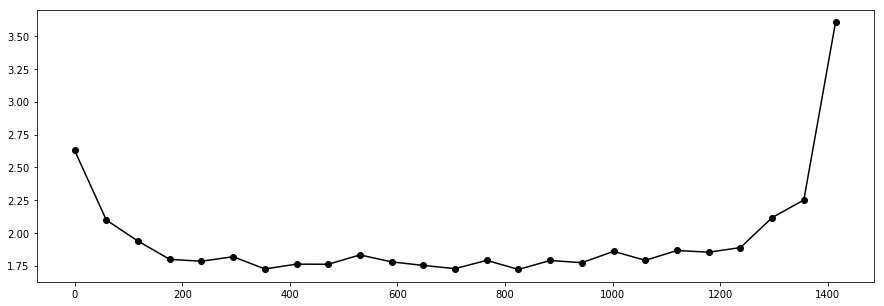

In [22]:
comparar4 = flasz(x1, y1, x2, y2, longitud, nbins)

#### Comparamos las graficas de los estimadores

<Figure size 360x360 with 0 Axes>

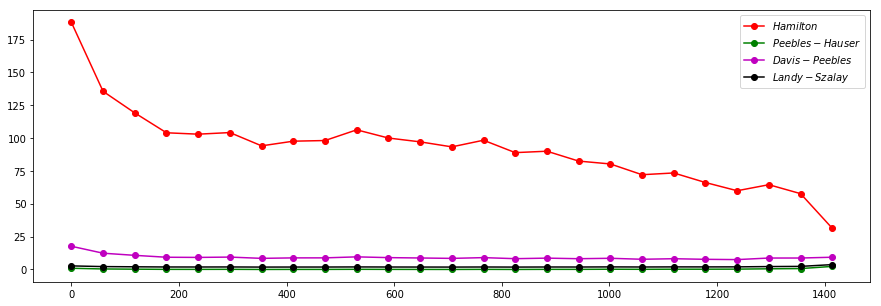

In [40]:
lmax = np.sqrt(2 * longitud ** 2)
x = np.linspace(0, lmax, len(comparar1))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x, comparar1, 'bo-', label='$Hamilton$', color = 'r')
plt.plot(x, comparar2, 'bo-', label='$Peebles - Hauser$', color = 'g')
plt.plot(x, comparar3, 'bo-', label='$Davis - Peebles$', color = 'm')
plt.plot(x, comparar4, 'bo-', label='$Landy - Szalay$', color = 'k')
plt.legend()